# **Analisis de Empleabilidad y Salarios del Sector de DataScience 2020-2025**

<image src="img/dataset-cover.jpg">

_____

## **TEMA**

Este proyecto se centra en realizar un Análisis Exploratorio de Datos (EDA) para descubrir datos de interes, patrones y tendencias en las ofertas de trabajo realacionadas con los datos recojidas en el DataSet.
El objetivo es comprender las necesidades y puntos fuertes del sector para asi resolver dudas de trabajadores y sobre todo de estudiantes siendo asi un factor de cierre en ventas de cursos al resolver un numero de dudas con respecto al sector.

## **HIPOTESIS**

- La demanda de empleos relacionados con los datos a aumentado en los ultimos años y muestra indicios de seguir aumentando
- Los salarios tienden a superar la mediana de la poblacion. Alrededor de que porciento de la poblacion (percentiles) se encuentran los salarios?
- En el sector se aprecia un alto inidice de empleos remotos o hibridos que va en aumento con el paso de los años
- Estados unidos se corona como el pais donde mas demanda del sector hay. En Europa la mayoria de empleos se encontraran en paises como Inglaterra y Alemania, y España estara entre los 10 primeros
- Las empresas grandes no son necesariamente las que mejor pagan. Cual es la relacion entre la experiencia de trabajo y la demanda de esta segun el tamaño de la empresa?. A que tipo de empresa es mas coveniente ir segun la experiencia en el sector?

``` Trabajo que mas se repite```   
``` Trabajo que mas cobra de media```   
``` WordCloud como banner de la presentacion```


## **OBTENCION DE LOS DATOS**

### __FUENTES__   
- Kaggle: The AI, ML, Data Science Salary (2020- 2025) DataSet - [ [Link](https://www.kaggle.com/datasets/samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025) ]
- stack***overflow*** : 2024 Developer Survey - [ [Link](https://survey.stackoverflow.co/2024/work/) ]
- Manfred : Tech Career Report - **$**.alarios - [ [Link](https://www.getmanfred.com/blog/tech-career-report-alarios) ]

### **IMPORTACION DE LIBRERIAS**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
import warnings
warnings.filterwarnings('ignore')

In [23]:
plt.style.use('seaborn-v0_8')

## **DATA UNDERSTANDING**

### __Muestra de las primeras 10 entradas del DataSet__   

In [24]:
jobs = pd.read_csv('./data/salaries.csv')
jobs.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M
5,2025,EN,FT,Data Analyst,82000,USD,82000,US,0,US,M
6,2025,EN,FT,Data Analyst,44000,USD,44000,US,0,US,M
7,2025,SE,FT,Software Development Engineer,149800,USD,149800,US,0,US,L
8,2025,SE,FT,Software Development Engineer,89700,USD,89700,US,0,US,L
9,2025,SE,FT,Research Scientist,200000,USD,200000,US,0,US,M


### __Muestra de infromacion general del DataSet__   

In [25]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


### __Muestra de datos estadisticos generales del DataSet__   

In [26]:
jobs.describe().round()

,work_year,salary,salary_in_usd,remote_ratio
count,88584.0,88584.0,88584.0,88584.0
mean,2024.0,161932.0,157568.0,21.0
std,1.0,196532.0,73531.0,41.0
min,2020.0,14000.0,15000.0,0.0
25%,2024.0,106000.0,106097.0,0.0
50%,2024.0,147000.0,146307.0,0.0
75%,2024.0,199500.0,198600.0,0.0
max,2025.0,30400000.0,800000.0,100.0


In [27]:
jobs.duplicated(keep=False).value_counts()

True     57669
False    30915
Name: count, dtype: int64

## **DATA CLEANIG**

### __Eliminacion de puestos no relacionados con Data Science__

In [28]:
key_words = ('Data','Machine Learning', 'Analyst', 'Analysis', 'Analytics','Bussiness Intelligence', 'AI', 'BI', 'Decision Scientist','Computer Vision', 'NLP', 'ML', 'Artificial Intelligence','Deep Learning', 'ETL')

jobs = jobs[jobs['job_title'].str.contains('|'.join(key_words))]


### __Comprobar que todos los puestos filtrados esten relacionados con Data Science__

In [29]:
print(jobs['job_title'].unique()[:10])  ## Slicing de 10 para mantener el jupyter organizado

['Data Analyst' 'Data Scientist' 'AI Data Scientist'
 'Admin & Data Analyst' 'Data Management Specialist' 'Data Product Owner'
 'Machine Learning Engineer' 'Data Engineer' 'Data Operations Engineer'
 'Analytics Engineer']


### __Eliminar puestos del año 2025__ 
  - ***Los datos recojen una pequeña parte del año que no representa una muestra para poder usar en el EDA***

In [30]:
jobs = jobs[jobs['work_year'] != 2025]

### __Eliminar puestos ejecutivos para disminuir el sesgo de los datos__   
  - ***Presentar antes un resumen corto***

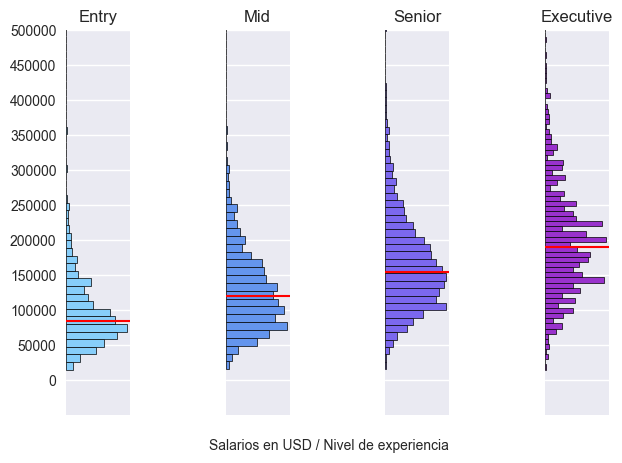

In [31]:

fig, ax = plt.subplots(1, 4, sharey=True, figsize=(7, 5))

medians = {
    'EN': jobs[jobs['experience_level'] == 'EN']['salary_in_usd'].median(),
    'MI': jobs[jobs['experience_level'] == 'MI']['salary_in_usd'].median(),
    'SE': jobs[jobs['experience_level'] == 'SE']['salary_in_usd'].median(),
    'EX': jobs[jobs['experience_level'] == 'EX']['salary_in_usd'].median()
}


ax[0].hist(x=jobs[jobs['experience_level'] == 'EN']['salary_in_usd'], bins=70, edgecolor='black', color='#87CEFA', orientation='horizontal', linewidth=0.5)
ax[0].axhline(medians['EN'], color='red', linestyle='-', linewidth=1.5)
ax[0].set_title('Entry')
ax[0].set_xticks([])

ax[1].hist(x=jobs[jobs['experience_level'] == 'MI']['salary_in_usd'], bins=70, edgecolor='black', color='#6495ED', orientation='horizontal', linewidth=0.5)
ax[1].axhline(medians['MI'], color='red', linestyle='-', linewidth=1.5)
ax[1].set_title('Mid')
ax[1].set_xticks([])

ax[2].hist(x=jobs[jobs['experience_level'] == 'SE']['salary_in_usd'], bins=70, edgecolor='black', color='#7B68EE', orientation='horizontal', linewidth=0.5)
ax[2].axhline(medians['SE'], color='red', linestyle='-', linewidth=1.5)
ax[2].set_title('Senior')
ax[2].set_xticks([])

ax[3].hist(x=jobs[jobs['experience_level'] == 'EX']['salary_in_usd'], bins=70, edgecolor='black', color='#9932CC', orientation='horizontal', linewidth=0.5)
ax[3].axhline(medians['EX'], color='red', linestyle='-', linewidth=1.5)
ax[3].set_title('Executive')
ax[3].set_xticks([])

ax[0].set_yticks(np.arange(0,500001,50000))
ax[0].set_ylim(-50000, 500000)

[spine.set_visible(False) for ax in ax.ravel() for spine in ax.spines.values()]

plt.subplots_adjust(wspace=1.5)

fig.text(0.5, 0.04, 'Salarios en USD / Nivel de experiencia', ha='center', fontsize=10)  # X-axis label

plt.show()

In [32]:
jobs = jobs[jobs['experience_level'] != 'EX']

### **Verificacion de duplicados**

In [33]:
jobs.duplicated(keep=False).value_counts()

True     30336
False    14252
Name: count, dtype: int64

In [34]:
jobs[(jobs.duplicated(keep=False)) == True]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
15842,2024,MI,FT,Analytics Engineer,720000,USD,720000,US,0,US,M
15843,2024,MI,FT,Analytics Engineer,170000,USD,170000,US,0,US,M
15844,2024,MI,FT,Analytics Engineer,720000,USD,720000,US,0,US,M
15845,2024,MI,FT,Analytics Engineer,170000,USD,170000,US,0,US,M
15847,2024,MI,FT,Analytics Engineer,100000,USD,100000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
88426,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
88431,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S
88502,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
88506,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S


***Se llega a al conclusion de que pueden haber trabajos que compartan los mismos datos por lo tanto, al no haber indicio de haber creado duplicados en modifiaciones anteriores, se mantiene el DataSet tal cual esta***

### **Nuevos datos y transformaciones**

***Nada por ahora***

## **Data ANALYSIS**

### **Comportamiento de demanda de empleo a traves de los años**

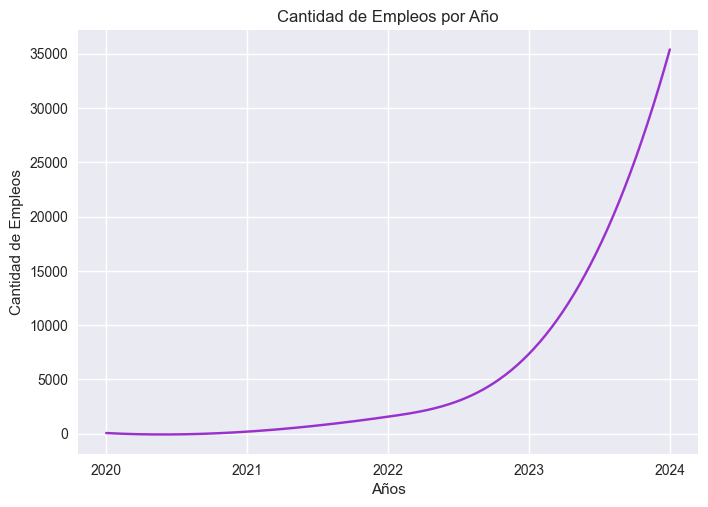

In [64]:
jobs_by_year = jobs.groupby('work_year')['job_title'].count()

x = jobs_by_year.index
y = jobs_by_year.values

# Spline interpolation for smoothing
x_smooth = np.linspace(x.min(), x.max(), 300)  # Generate more points for a smooth curve
spline = make_interp_spline(x, y, k=3)  # Cubic spline
y_smooth = spline(x_smooth)

plt.plot(x_smooth, y_smooth, color='#9932CC')
plt.title('Cantidad de Empleos por Año')
plt.xlabel('Años')
plt.ylabel('Cantidad de Empleos')
plt.xticks(x)

plt.show()

### **Comportamiento de los salarios a traves de los años**

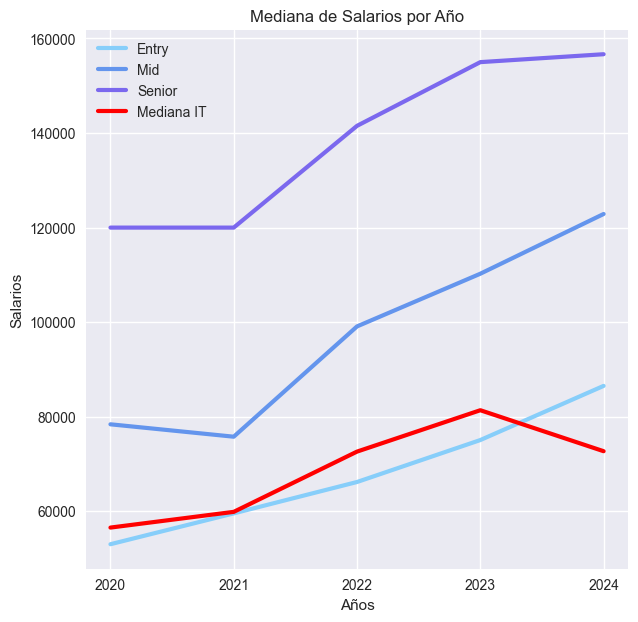

In [63]:

so_dev_salary = pd.read_csv('data\SO_dev_salary.csv')

so_dev_salary['salaries'] = so_dev_salary['salaries'].astype(int)
so_dev_salary = so_dev_salary.groupby('year')[['salaries']].mean()


jobs_by_xp = jobs.groupby(['experience_level', 'work_year'])[['salary_in_usd']].median()

plt.figure(figsize=(7,7));
plt.plot(jobs_by_xp.loc["EN"], label="Entry", color='#87CEFA', lw=3)
plt.plot(jobs_by_xp.loc["MI"], label="Mid", color='#6495ED', lw=3)
plt.plot(jobs_by_xp.loc["SE"], label="Senior", color='#7B68EE', lw=3)
# plt.axhline(100000, color='red', label='Mediana IT', lw=3) ## INFORMACION COMPARATIVA DE MEDIANA DE IT
plt.plot(so_dev_salary, color='red', label='Mediana IT', lw=3)


plt.legend()
plt.title('Mediana de Salarios por Año')
plt.xlabel('Años')
plt.ylabel('Salarios')
plt.xticks([2020,2021,2022,2023,2024])

plt.show()

- **Media Salarial Manfred 2024 : €40.731**

### **Comportamiento de las modalidades ( Remoto, Hibrido y Presencial ) a traves de los años**

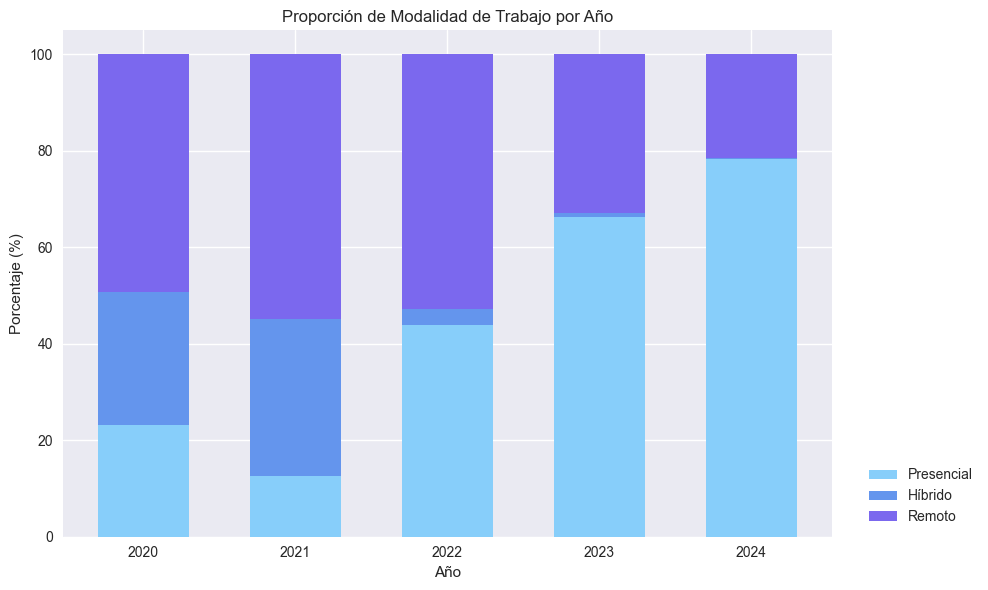

In [38]:
remote_ratios = pd.DataFrame(jobs.groupby(['work_year'])['remote_ratio'].value_counts(normalize=True) *100)

remote_ratios = remote_ratios.reset_index()
remote_ratios

pivoted_ratios = remote_ratios.pivot(index='work_year', columns='remote_ratio', values='proportion')
pivoted_ratios



fig, ax = plt.subplots(figsize=(10, 6))

bar_positions = pivoted_ratios.index
bar_width = 0.6


ax.bar(bar_positions, pivoted_ratios[0], label='Presencial', color='#87CEFA', width=bar_width)
ax.bar(bar_positions, pivoted_ratios[50], bottom=pivoted_ratios[0], label='Híbrido', color='#6495ED', width=bar_width)
ax.bar(bar_positions, pivoted_ratios[100], bottom=pivoted_ratios[0] + pivoted_ratios[50], label='Remoto', color='#7B68EE', width=bar_width)


ax.set_title('Proporción de Modalidad de Trabajo por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Porcentaje (%)')
ax.set_xticks(bar_positions)
ax.set_xticklabels(pivoted_ratios.index)
ax.legend(loc='lower right', bbox_to_anchor=(1.2,0))

plt.tight_layout()
plt.show()


### **Que paises lideran en el sector de Data Science**

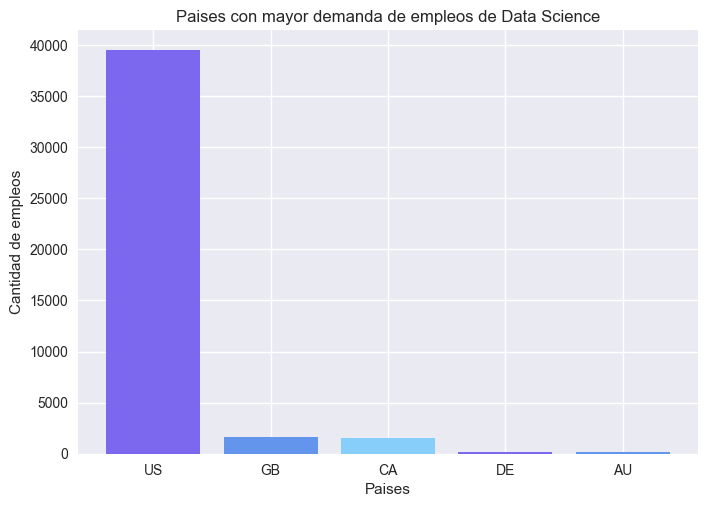

In [68]:
countries = pd.DataFrame(jobs['company_location'].value_counts())
countries = countries.reset_index()

plt.bar(data=countries.iloc[:5], x='company_location', height='count', color=['#7B68EE', '#6495ED', '#87CEFA'])
plt.title('Paises con mayor demanda de empleos de Data Science')
plt.xlabel('Paises')
plt.ylabel('Cantidad de empleos')

plt.show()

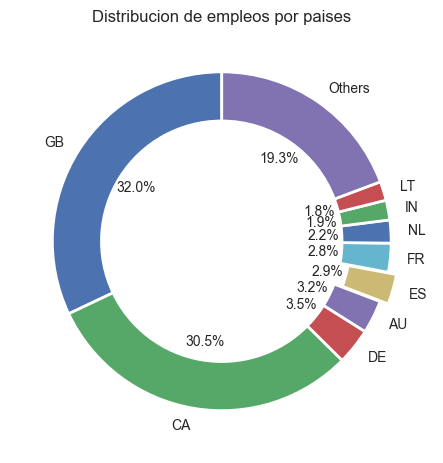

In [66]:
main = countries[countries['company_location'] != "US"] # & (countries['company_location'] != "CA") & (countries['company_location'] != "IN")'''
main = main.iloc[:9]
others = countries.iloc[9:]['count'].sum()
others
main

sizes = main['count'].tolist() + [others]
labels = main['company_location'].tolist() + ['Others']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white','width': 0.29}, explode=[0.05 if label == 'ES' else 0 for label in labels])

plt.title('Distribucion de empleos por paises')
plt.show()

### **Comportamineto de los salarios segun los tipos de compañia**

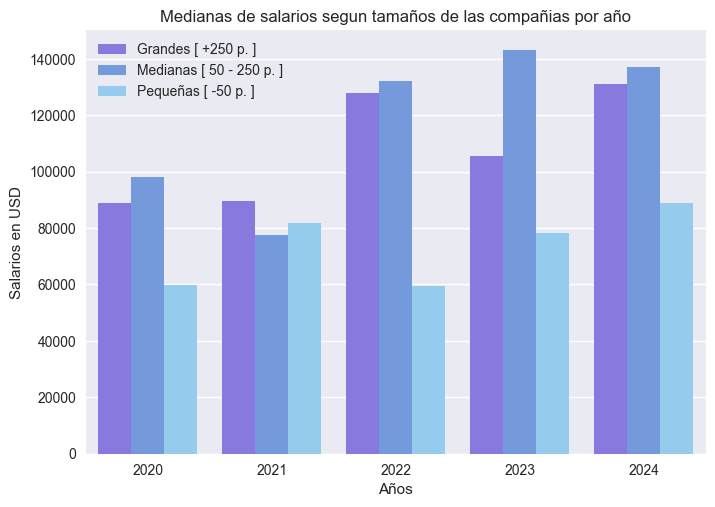

In [67]:
company_sizes = pd.DataFrame(jobs.groupby(['work_year','company_size'])['salary_in_usd'].median())
company_sizes = company_sizes.reset_index()
company_sizes

company_sizes['company_size'][company_sizes['company_size'] == 'L'] = 'Grandes [ +250 p. ]'
company_sizes['company_size'][company_sizes['company_size'] == 'M'] = 'Medianas [ 50 - 250 p. ]'
company_sizes['company_size'][company_sizes['company_size'] == 'S'] = 'Pequeñas [ -50 p. ]'


sns.barplot(data=company_sizes, x='work_year', y='salary_in_usd', hue='company_size', palette=['#7B68EE', '#6495ED', '#87CEFA'])

plt.legend()
plt.title('Medianas de salarios segun tamaños de las compañias por año')
plt.ylabel("Salarios en USD")
plt.xlabel('Años')

plt.show()

- **Selecionando el ultimo año y añadiendo el nivel de experiencia**

Text(0.5, 0, 'Nivel de Experiencia')

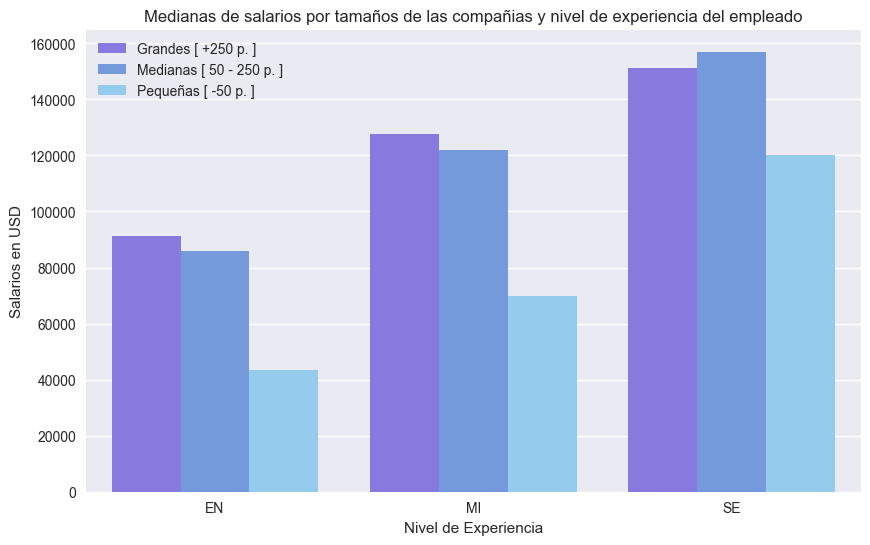

In [40]:
xp_sizes = pd.DataFrame(jobs[(jobs['work_year']==2024)].groupby(['experience_level','company_size'])['salary_in_usd'].median())
xp_sizes = xp_sizes.reset_index()
xp_sizes

xp_sizes['company_size'][xp_sizes['company_size'] == 'L'] = 'Grandes [ +250 p. ]'
xp_sizes['company_size'][xp_sizes['company_size'] == 'M'] = 'Medianas [ 50 - 250 p. ]'
xp_sizes['company_size'][xp_sizes['company_size'] == 'S'] = 'Pequeñas [ -50 p. ]'


plt.figure(figsize=(10,6))
sns.barplot(data=xp_sizes, x='experience_level', y='salary_in_usd', hue='company_size', palette=['#7B68EE', '#6495ED', '#87CEFA'])

plt.legend()
plt.title('Medianas de salarios por tamaños de las compañias y nivel de experiencia del empleado')
plt.ylabel("Salarios en USD")
plt.xlabel('Nivel de Experiencia')